Cargamos los datasets

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [2]:
english_paradetox_df = pd.read_csv("datos/english_paradetox_preprocessed.csv")
english_multilingual_toxicity_df = pd.read_csv("datos/english_multilingual_toxicity_preprocessed.csv")
english_toxic_keywords_df = pd.read_csv("datos/english_toxic_keywords_preprocessed.csv")
english_toxic_spans_df = pd.read_csv("datos/english_toxic_spans_preprocessed.csv")
english_paradetox_test_set_df = pd.read_csv("datos/english_paradetox_test_set_preprocessed.csv")

Análisis de algunas columnas con Bag-of-Words

Palabras más tóxicas de Paradetox: frases tóxicas y neutrales

In [3]:
english_paradetox_df['toxic_sentence_str'] = english_paradetox_df['toxic_sentence_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
english_paradetox_df['neutral_sentence_str'] = english_paradetox_df['neutral_sentence_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

vectorizer_bow = CountVectorizer()
X_toxic_bow = vectorizer_bow.fit_transform(english_paradetox_df['toxic_sentence_str'])
X_neutral_bow = vectorizer_bow.transform(english_paradetox_df['neutral_sentence_str'])

word_counts = np.array(X_toxic_bow.sum(axis=0)).flatten()
words = vectorizer_bow.get_feature_names_out()
top_indices = word_counts.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en frases tóxicas:")
for i in top_indices:
    print(words[i], word_counts[i])

word_counts_neutral = np.array(X_neutral_bow.sum(axis=0)).flatten()
top_indices_neutral = word_counts_neutral.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en frases neutrales:")
for i in top_indices_neutral:
    print(words[i], word_counts_neutral[i])

Top 10 palabras más frecuentes en frases tóxicas:
shit 87
fuck 61
fucking 50
get 21
people 21
stupid 17
like 15
article 15
stop 14
think 12
Top 10 palabras más frecuentes en frases neutrales:
people 34
person 26
bad 24
get 22
thing 21
like 20
article 16
stop 15
really 14
re 12


In [4]:
english_multilingual_toxicity_df['text_str'] = english_multilingual_toxicity_df['text_tokens'].apply(
    lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x)
)
X_text_bow = vectorizer_bow.fit_transform(english_multilingual_toxicity_df['text_str'])

word_counts_text = np.array(X_text_bow.sum(axis=0)).flatten()
words_text = vectorizer_bow.get_feature_names_out()
top_indices_text = word_counts_text.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en el dataset Multilingual Toxicity:")
for i in top_indices_text:
    print(words_text[i], word_counts_text[i])

Top 10 palabras más frecuentes en el dataset Multilingual Toxicity:
url 729
woman 426
fuck 396
bitch 375
like 337
people 321
love 303
as 242
fucking 239
white 221


In [5]:
english_toxic_spans_df['Sentence_str'] = english_toxic_spans_df['Sentence_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
english_toxic_spans_df['Negative Connotations_str'] = english_toxic_spans_df['Negative Connotations_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

vectorizer_sentence = CountVectorizer()
X_sentence_bow = vectorizer_sentence.fit_transform(english_toxic_spans_df['Sentence_str'])

word_counts_sentence = np.array(X_sentence_bow.sum(axis=0)).flatten()
words_sentence = vectorizer_sentence.get_feature_names_out()
top_indices_sentence = word_counts_sentence.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en frases tóxicas:")
for i in top_indices_sentence:
    print(words_sentence[i], word_counts_sentence[i])

vectorizer_negative = CountVectorizer()
X_negative_bow = vectorizer_negative.fit_transform(english_toxic_spans_df['Negative Connotations_str'])

word_counts_negative = np.array(X_negative_bow.sum(axis=0)).flatten()
words_negative = vectorizer_negative.get_feature_names_out()
top_indices_negative = word_counts_negative.argsort()[::-1][:10]

print("\nTop 10 palabras más frecuentes en connotaciones negativas:")
for i in top_indices_negative:
    print(words_negative[i], word_counts_negative[i])


Top 10 palabras más frecuentes en frases tóxicas:
shit 210
fuck 159
fucking 134
people 56
like 52
get 45
stupid 44
stop 37
give 37
page 36

Top 10 palabras más frecuentes en connotaciones negativas:
shit 209
fuck 158
fucking 134
stupid 44
idiot 29
as 28
fucked 28
dick 26
cunt 22
hell 21


In [6]:
vectorizer_tfidf = TfidfVectorizer()
X_toxic_tfidf = vectorizer_tfidf.fit_transform(english_paradetox_df['toxic_sentence_str'])
X_neutral_tfidf = vectorizer_tfidf.transform(english_paradetox_df['neutral_sentence_str'])

# Obtener palabras y sus "importancias" totales (suma de TF-IDF por palabra)
tfidf_scores_toxic = np.array(X_toxic_tfidf.sum(axis=0)).flatten()
tfidf_scores_neutral = np.array(X_neutral_tfidf.sum(axis=0)).flatten()
words = vectorizer_tfidf.get_feature_names_out()

# Top 10 palabras con mayor TF-IDF en frases tóxicas
top_indices_toxic = tfidf_scores_toxic.argsort()[::-1][:10]
print("Top 10 palabras con mayor TF-IDF en frases tóxicas:")
for i in top_indices_toxic:
    print(words[i], tfidf_scores_toxic[i])

# Top 10 palabras con mayor TF-IDF en frases neutrales
top_indices_neutral = tfidf_scores_neutral.argsort()[::-1][:10]
print("Top 10 palabras con mayor TF-IDF en frases neutrales:")
for i in top_indices_neutral:
    print(words[i], tfidf_scores_neutral[i])

Top 10 palabras con mayor TF-IDF en frases tóxicas:
shit 18.28972122222328
fuck 16.359097821387362
fucking 13.170626013547754
get 6.24108346226068
people 6.186986680102589
stupid 6.044056693631494
give 5.642601486408178
dick 5.443859872318509
article 5.003552234047351
stop 4.738384932628404
Top 10 palabras con mayor TF-IDF en frases neutrales:
person 13.106796008722371
bad 12.66099648161129
people 10.250959603425644
thing 8.712534172669871
get 7.2486731343441155
care 6.50504539948046
like 6.491238122946108
article 5.788535674141514
stop 5.59377086700648
anything 4.972603034549697


In [7]:
vectorizer_sentence_tfidf = TfidfVectorizer()
X_sentence_tfidf = vectorizer_sentence_tfidf.fit_transform(english_toxic_spans_df['Sentence_str'])

tfidf_scores_sentence = np.array(X_sentence_tfidf.sum(axis=0)).flatten()
words_sentence = vectorizer_sentence_tfidf.get_feature_names_out()
top_indices_sentence = tfidf_scores_sentence.argsort()[::-1][:10]

print("Top 10 palabras con mayor TF-IDF en frases tóxicas:")
for i in top_indices_sentence:
    print(words_sentence[i], tfidf_scores_sentence[i])

# TF-IDF para palabras anotadas como negativas
vectorizer_negative_tfidf = TfidfVectorizer()
X_negative_tfidf = vectorizer_negative_tfidf.fit_transform(english_toxic_spans_df['Negative Connotations_str'])

tfidf_scores_negative = np.array(X_negative_tfidf.sum(axis=0)).flatten()
words_negative = vectorizer_negative_tfidf.get_feature_names_out()
top_indices_negative = tfidf_scores_negative.argsort()[::-1][:10]

print("\nTop 10 palabras con mayor TF-IDF en connotaciones negativas:")
for i in top_indices_negative:
    print(words_negative[i], tfidf_scores_negative[i])

Top 10 palabras con mayor TF-IDF en frases tóxicas:
shit 42.18388820183688
fuck 38.49558781014845
fucking 31.950765108626562
people 15.637035292247655
give 15.117053310936704
like 14.129861576562536
stupid 13.642080626232609
get 13.325038373049157
dick 11.864413517457544
stop 11.770412794081182

Top 10 palabras con mayor TF-IDF en connotaciones negativas:
shit 139.6059986713561
fuck 117.73029430535641
fucking 90.13859820090603
stupid 37.093153396283576
fucked 26.154340699959757
idiot 24.59738840577523
dick 21.653606553795203
as 17.93503580869092
cunt 16.45707324009507
hell 16.151085004951142


In [8]:
# TF-IDF para frases completas
vectorizer_sentence_tfidf = TfidfVectorizer()
X_sentence_tfidf = vectorizer_sentence_tfidf.fit_transform(english_toxic_spans_df['Sentence_str'])

tfidf_scores_sentence = np.array(X_sentence_tfidf.sum(axis=0)).flatten()
words_sentence = vectorizer_sentence_tfidf.get_feature_names_out()
top_indices_sentence = tfidf_scores_sentence.argsort()[::-1][:10]

print("Top 10 palabras con mayor TF-IDF en frases tóxicas:")
for i in top_indices_sentence:
    print(words_sentence[i], tfidf_scores_sentence[i])

# TF-IDF para palabras anotadas como negativas
vectorizer_negative_tfidf = TfidfVectorizer()
X_negative_tfidf = vectorizer_negative_tfidf.fit_transform(english_toxic_spans_df['Negative Connotations_str'])

tfidf_scores_negative = np.array(X_negative_tfidf.sum(axis=0)).flatten()
words_negative = vectorizer_negative_tfidf.get_feature_names_out()
top_indices_negative = tfidf_scores_negative.argsort()[::-1][:10]

print("\nTop 10 palabras con mayor TF-IDF en connotaciones negativas:")
for i in top_indices_negative:
    print(words_negative[i], tfidf_scores_negative[i])


Top 10 palabras con mayor TF-IDF en frases tóxicas:
shit 42.18388820183688
fuck 38.49558781014845
fucking 31.950765108626562
people 15.637035292247655
give 15.117053310936704
like 14.129861576562536
stupid 13.642080626232609
get 13.325038373049157
dick 11.864413517457544
stop 11.770412794081182

Top 10 palabras con mayor TF-IDF en connotaciones negativas:
shit 139.6059986713561
fuck 117.73029430535641
fucking 90.13859820090603
stupid 37.093153396283576
fucked 26.154340699959757
idiot 24.59738840577523
dick 21.653606553795203
as 17.93503580869092
cunt 16.45707324009507
hell 16.151085004951142


Embedings

Word2Vec-Paradetox

In [9]:
from gensim.models import Word2Vec
from gensim import utils
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Callback para monitorizar el entrenamiento
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss - self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss


In [10]:
class ParadetoxCorpus:
    """Iterador sobre frases tokenizadas del dataset Paradetox"""

    def __init__(self, df):
        self.df = df

    def __iter__(self):
        # Itera sobre todas las frases tóxicas y neutrales
        for tokens in self.df['toxic_sentence_tokens']:
            yield tokens
        for tokens in self.df['neutral_sentence_tokens']:
            yield tokens


In [11]:
def ensure_list(tokens):
    if isinstance(tokens, str):
        # Evalúa la cadena para convertirla a lista
        return eval(tokens)
    return tokens

english_paradetox_df['toxic_sentence_tokens'] = english_paradetox_df['toxic_sentence_tokens'].apply(ensure_list)
english_paradetox_df['neutral_sentence_tokens'] = english_paradetox_df['neutral_sentence_tokens'].apply(ensure_list)

sentences = ParadetoxCorpus(english_paradetox_df)
epoch_logger = EpochLogger()

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=200,
    window=5,
    min_count=1,
    negative=5,
    compute_loss=True,
    callbacks=[epoch_logger],
    epochs=50000
)

# Guardar el modelo
w2v_model.save("english_paradetox_w2v.model")


Loss after epoch 0: 16112.1435546875
Loss after epoch 1: 16113.0732421875
Loss after epoch 2: 16080.212890625
Loss after epoch 3: 16156.7265625
Loss after epoch 4: 16089.859375
Loss after epoch 5: 16046.6171875
Loss after epoch 6: 16119.8671875
Loss after epoch 7: 16029.40625
Loss after epoch 8: 16171.8125
Loss after epoch 9: 16141.59375
Loss after epoch 10: 16032.59375
Loss after epoch 11: 15950.28125
Loss after epoch 12: 15510.375
Loss after epoch 13: 15139.9375
Loss after epoch 14: 14490.484375
Loss after epoch 15: 13680.15625
Loss after epoch 16: 13032.890625
Loss after epoch 17: 12554.75
Loss after epoch 18: 12107.75
Loss after epoch 19: 11824.28125
Loss after epoch 20: 11507.34375
Loss after epoch 21: 11443.6875
Loss after epoch 22: 11277.15625
Loss after epoch 23: 11148.15625
Loss after epoch 24: 11034.59375
Loss after epoch 25: 10959.46875
Loss after epoch 26: 10959.21875
Loss after epoch 27: 10902.21875
Loss after epoch 28: 10944.8125
Loss after epoch 29: 10863.1875
Loss after

c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


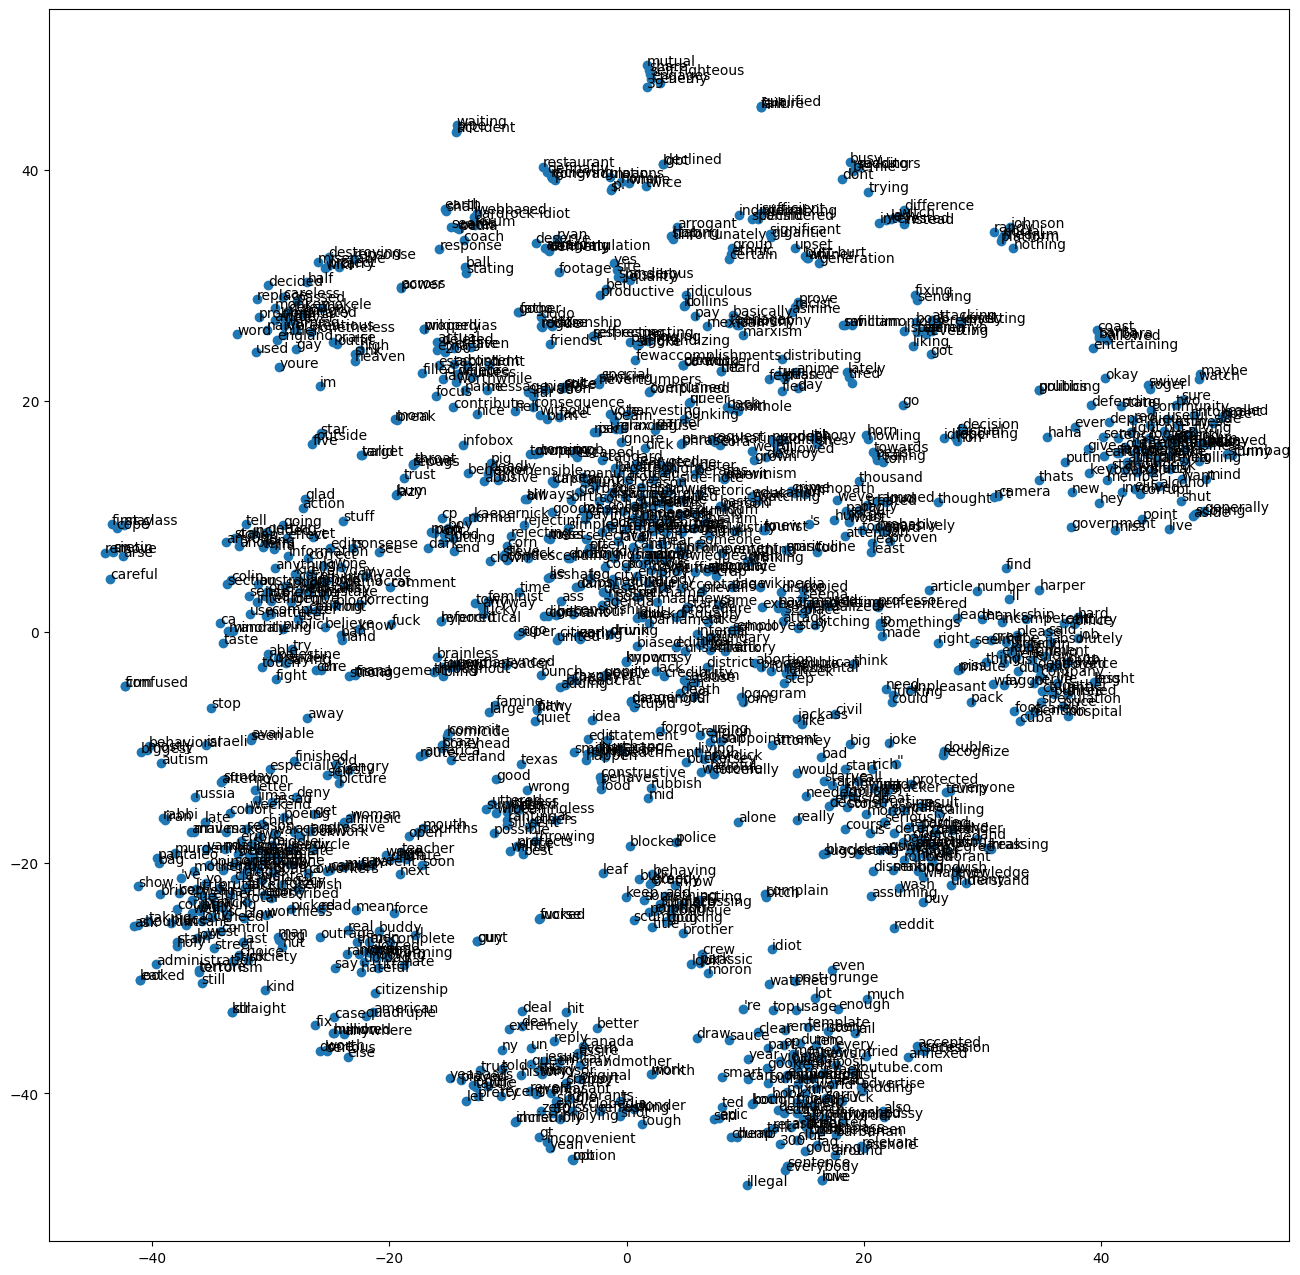

In [12]:
# Tomamos las 2000 palabras más frecuentes
words = list(w2v_model.wv.index_to_key)[:2000]
vectors = [w2v_model.wv[word] for word in words]

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
vectors_pca = pca.fit_transform(vectors)

# t-SNE
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=10)
tsne_vectors = tsne.fit_transform(np.array(vectors))

# Visualización
plt.figure(figsize=(16, 16))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (tsne_vectors[i, 0], tsne_vectors[i, 1]))
plt.show()


Wors2Vec-Multilingual Toxicity

Loss after epoch 0: 73334.7890625
Loss after epoch 1: 72919.4140625
Loss after epoch 2: 70465.421875
Loss after epoch 3: 63115.84375
Loss after epoch 4: 57038.15625
Loss after epoch 5: 53912.5
Loss after epoch 6: 52156.15625
Loss after epoch 7: 50927.15625
Loss after epoch 8: 50204.625
Loss after epoch 9: 49244.4375
Loss after epoch 10: 48692.25
Loss after epoch 11: 47944.0625
Loss after epoch 12: 47334.0625
Loss after epoch 13: 46725.9375
Loss after epoch 14: 46101.125
Loss after epoch 15: 45424.0
Loss after epoch 16: 44747.6875
Loss after epoch 17: 44183.375
Loss after epoch 18: 43395.6875
Loss after epoch 19: 42542.1875
Loss after epoch 20: 41803.875
Loss after epoch 21: 40995.125
Loss after epoch 22: 40075.125
Loss after epoch 23: 39293.0
Loss after epoch 24: 38472.625
Loss after epoch 25: 37861.125
Loss after epoch 26: 36806.75
Loss after epoch 27: 35754.875
Loss after epoch 28: 34833.875
Loss after epoch 29: 33865.625
Loss after epoch 30: 33155.125
Loss after epoch 31: 32050.125


c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


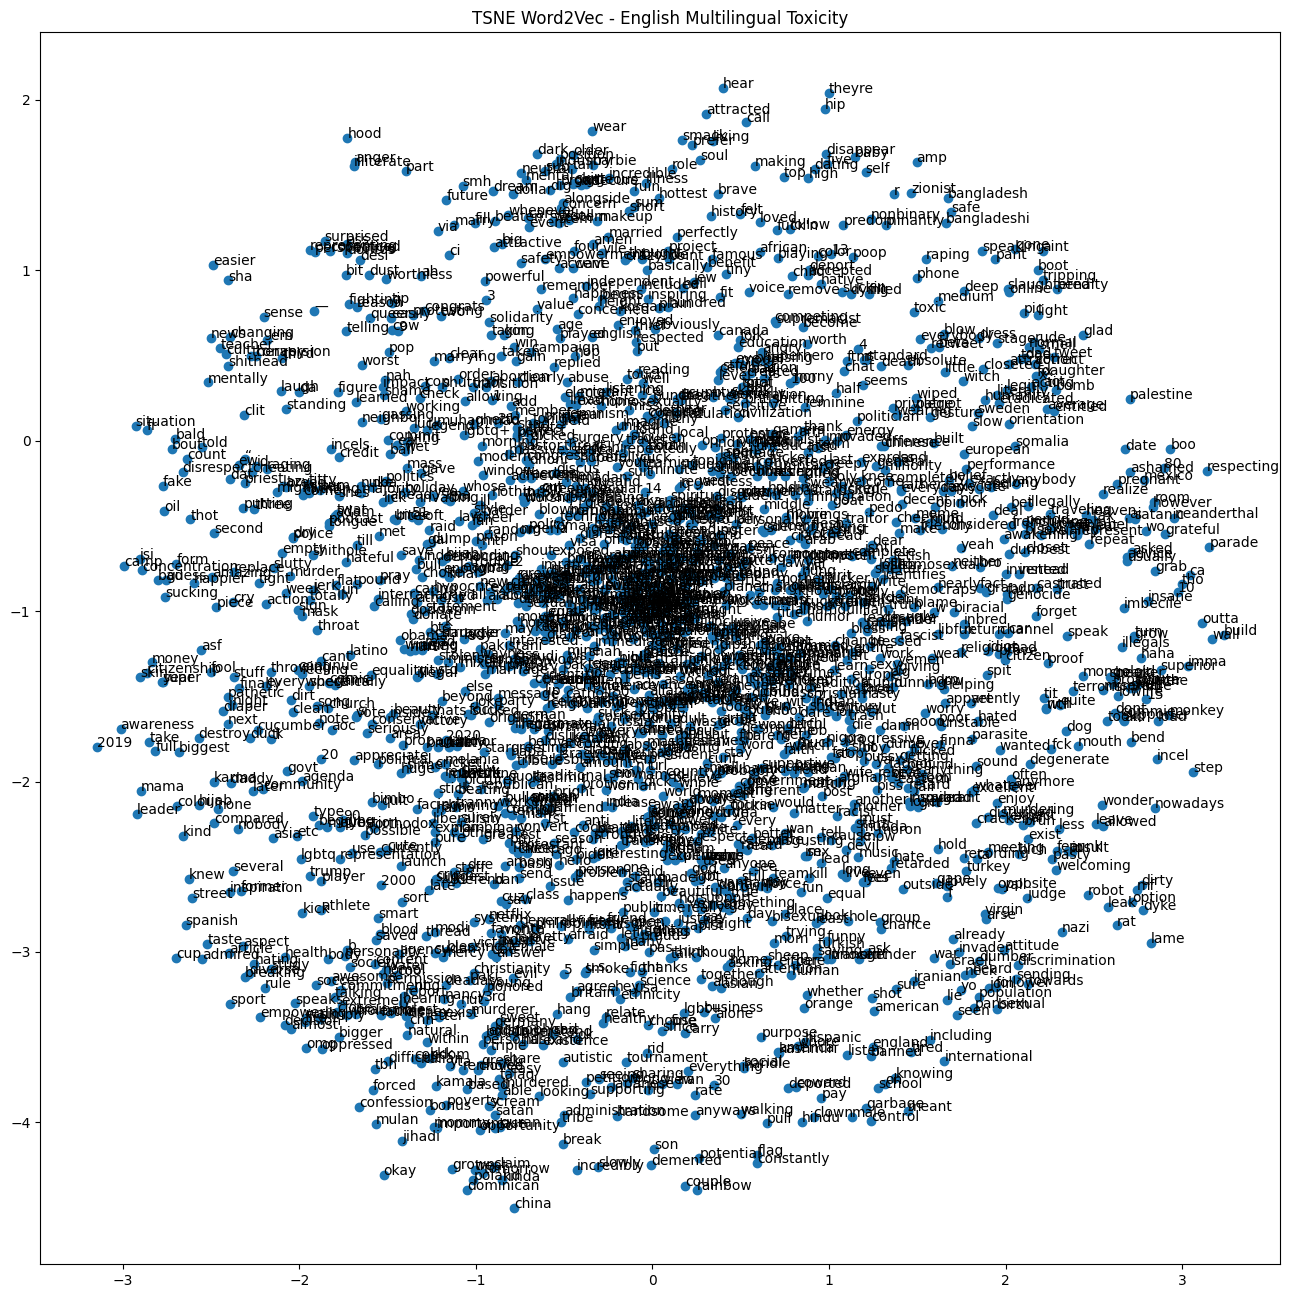

In [13]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Función para asegurar que los tokens son listas
def ensure_list(tokens):
    if isinstance(tokens, str):
        return eval(tokens)
    return tokens

# Cargar dataset preprocesado
english_multilingual_toxicity_df = pd.read_csv("datos/english_multilingual_toxicity_preprocessed.csv")

# Asegurar que la columna de tokens es lista
english_multilingual_toxicity_df['text_tokens'] = english_multilingual_toxicity_df['text_tokens'].apply(ensure_list)

# Callback para mostrar el loss durante entrenamiento de Word2Vec
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print(f"Loss after epoch {self.epoch}: {loss}")
        else:
            print(f"Loss after epoch {self.epoch}: {loss - self.loss_previous_step}")
        self.epoch += 1
        self.loss_previous_step = loss

epoch_logger = EpochLogger()

# Preparar las "sentencias" para Word2Vec
sentences = english_multilingual_toxicity_df['text_tokens'].tolist()

# Entrenar modelo Word2Vec
model_w2v = Word2Vec(
    sentences=sentences,
    vector_size=200,
    window=5,
    min_count=1,
    compute_loss=True,
    negative=5,
    epochs=50000,
    callbacks=[epoch_logger]
)

# Guardar el modelo
model_w2v.save("english_multilingual_toxicity_w2v.model")

# Visualización con TSNE
# Tomamos las primeras 2000 palabras más frecuentes
words = list(model_w2v.wv.index_to_key)[:2000]
vectors = [model_w2v.wv[word] for word in words]

tsne = TSNE(n_components=2, random_state=0, n_iter=3000, perplexity=50)
tsne_vectors = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(16, 16))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (tsne_vectors[i, 0], tsne_vectors[i, 1]))

plt.title("TSNE Word2Vec - English Multilingual Toxicity")
plt.show()


Embedings

No contextuales

In [16]:
import pandas as pd
import numpy as np

# --- Paso 1: Cargar tus datos ---
# Asegúrate de que esta columna tenga los tokens como una lista de palabras
try:
    # Intenta leerlo como si ya fuera una lista (si lo guardaste así)
    import ast
    df = pd.read_csv("datos/english_paradetox_preprocessed.csv")
    # 'text_tokens' es la columna que creaste en procesamiento.ipynb
    # ast.literal_eval convierte el string "['word1', 'word2']" en una lista
    all_tokens_list = df['toxic_sentence_tokens'].apply(ast.literal_eval)
except:
    # Si falla, cárgalo como texto y tokeniza (ajusta según sea necesario)
    df = pd.read_csv("datos/english_paradetox_preprocessed.csv")
    all_tokens_list = df['toxic_sentence_tokens'].apply(lambda x: x.split()) # O la tokenización que uses

print(f"Datos cargados. Ejemplo de tokens: {all_tokens_list.iloc[0][:10]}")

# --- Paso 2: Crear tu vocabulario ---
mi_vocabulario = set()
for lista_tokens in all_tokens_list:
    mi_vocabulario.update(lista_tokens)

print(f"Tamaño total de mi vocabulario: {len(mi_vocabulario)} palabras únicas.")

# --- Paso 3: Cargar el modelo GloVe ---
# DEBES DESCARGAR ESTE ARCHIVO PRIMERO (ej. de https://nlp.stanford.edu/projects/glove/)
PATH_TO_GLOVE = "glove.6B.100d.txt" # ¡Actualiza esta ruta!
glove_embeddings = {}

try:
    with open(PATH_TO_GLOVE, 'r', encoding='utf-8') as f:
        for linea in f:
            partes = linea.split()
            palabra = partes[0]
            vector = np.asarray(partes[1:], dtype='float32')
            glove_embeddings[palabra] = vector
    print(f"Modelo GloVe cargado. {len(glove_embeddings)} palabras en el modelo.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo GloVe en {PATH_TO_GLOVE}")
    print("Por favor, descarga el archivo (ej. 'glove.6B.100d.txt') y actualiza la ruta.")
    # Salimos o continuamos sin el análisis si no se encuentra el archivo
    glove_embeddings = None


# --- Paso 4: Realizar el Análisis OOV (Out-of-Vocabulary) ---
if glove_embeddings:
    palabras_oov = []
    for palabra in mi_vocabulario:
        if palabra not in glove_embeddings:
            palabras_oov.append(palabra)

    num_oov = len(palabras_oov)
    num_vocab = len(mi_vocabulario)
    porcentaje_oov = (num_oov / num_vocab) * 100

    print("\n--- Análisis OOV (Out-of-Vocabulary) ---")
    print(f"Palabras en mi vocabulario: {num_vocab}")
    print(f"Palabras NO encontradas en GloVe (OOV): {num_oov}")
    print(f"Porcentaje de OOV: {porcentaje_oov:.2f}%")
    
    # Esto es lo que te pide la entrega: "Análisis de cuántas palabras no se pueden representar"
    print("\nEjemplos de palabras OOV (pueden ser errores tipográficos, jerga o palabras muy específicas):")
    print(palabras_oov[:20])

Datos cargados. Ejemplo de tokens: ['sudden', 'see', 'shes', 'got', 'big', 'phony', 'tit', 'everything']
Tamaño total de mi vocabulario: 1150 palabras únicas.
Error: No se encontró el archivo GloVe en glove.6B.100d.txt
Por favor, descarga el archivo (ej. 'glove.6B.100d.txt') y actualiza la ruta.


Contextuales

In [17]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel

# --- Paso 1: Cargar el modelo y tokenizador ---
# Usamos un modelo BERT base (sin distinción de mayúsculas/minúsculas)
modelo_nombre = "bert-base-uncased"
tokenizer_bert = AutoTokenizer.from_pretrained(modelo_nombre)
modelo_bert = AutoModel.from_pretrained(modelo_nombre)

print("Modelo BERT y tokenizador cargados.")

# --- Paso 2: Cargar tus datos ORIGINALES ---
# Necesitamos el texto original, no el preprocesado de 'procesamiento.ipynb'
# Ajusta esta ruta a tu dataset original (el que leíste al inicio de 'procesamiento.ipynb')
try:
    df_original = pd.read_csv("datos/english_paradetox.csv") # O el nombre de tu archivo original
    # Asumimos que la columna de texto se llama 'text'
    textos_originales = df_original['text'].tolist()
except Exception as e:
    print(f"Error cargando datos originales: {e}")
    print("Usando textos de ejemplo...")
    textos_originales = [
        "This is a toxic comment you idiot.",
        "I love this community, everyone is so nice.",
        "What a wonderful day."
    ]

# Vamos a probar con una lista pequeña de textos
textos_ejemplo = textos_originales[:5] 
print(f"\nTextos de ejemplo a procesar:\n{textos_ejemplo}")

# --- Paso 3: Tokenizar y Generar Embeddings ---

# Tokenizamos los textos. BERT se encarga de añadir [CLS], [SEP], padding y truncation.
inputs_tokenizados = tokenizer_bert(
    textos_ejemplo, 
    padding=True,       # Rellena frases cortas para que todas tengan el mismo tamaño
    truncation=True,    # Corta frases largas
    max_length=512,     # Máxima longitud que BERT puede manejar
    return_tensors="pt" # Devuelve tensores de PyTorch
)

print(f"\nShape de los inputs (Batch Size, Num Tokens): {inputs_tokenizados['input_ids'].shape}")

# Desactivamos el cálculo de gradientes (ahorra memoria, no estamos entrenando)
with torch.no_grad():
    # Pasamos los inputs al modelo
    outputs_bert = modelo_bert(**inputs_tokenizados)

# 'outputs_bert' contiene varias cosas. La que nos interesa es 'last_hidden_state'
# Esta tiene la forma (batch_size, sequence_length, hidden_size)
# (5 frases, N tokens, 768 dimensiones)
embeddings_ultima_capa = outputs_bert.last_hidden_state
print(f"Shape de los embeddings de salida: {embeddings_ultima_capa.shape}")


# --- Paso 4: Extraer la representación de la frase (Embedding [CLS]) ---
# BERT usa el primer token, [CLS], como una representación agregada de toda la secuencia.
# Por lo tanto, simplemente tomamos el embedding de ese primer token.
# [:, 0, :] significa:
#   :   -> todas las frases del batch
#   0   -> el primer token (que es [CLS])
#   :   -> todas las dimensiones del embedding (768)

embeddings_contextuales_cls = embeddings_ultima_capa[:, 0, :]

print(f"\nShape de los embeddings contextuales (uno por frase): {embeddings_contextuales_cls.shape}")

# --- ¡Listo! Estos son tus embeddings contextuales ---
# 'embeddings_contextuales_cls' es un tensor que tiene 5 vectores (uno por cada frase de ejemplo),
# y cada vector tiene 768 dimensiones.
print("\nEmbedding contextual para la primera frase (primeras 10 dimensiones):")
print(embeddings_contextuales_cls[0, :10])

c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\js834\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an adminis

Modelo BERT y tokenizador cargados.
Error cargando datos originales: [Errno 2] No such file or directory: 'datos/english_paradetox.csv'
Usando textos de ejemplo...

Textos de ejemplo a procesar:
['This is a toxic comment you idiot.', 'I love this community, everyone is so nice.', 'What a wonderful day.']

Shape de los inputs (Batch Size, Num Tokens): torch.Size([3, 12])
Shape de los embeddings de salida: torch.Size([3, 12, 768])

Shape de los embeddings contextuales (uno por frase): torch.Size([3, 768])

Embedding contextual para la primera frase (primeras 10 dimensiones):
tensor([ 0.1157,  0.3458, -0.2130, -0.2550, -0.5900, -0.4514,  0.1200,  0.4188,
         0.4187, -0.2928])


In [ ]:
import gensim

# --- 1. Cargar tu modelo ya entrenado ---
# (Asegúrate de que el nombre del archivo sea el correcto)
try:
    model_w2v = gensim.models.Word2Vec.load("english_multilingual_toxicity_w2v.model")
    print("Modelo 'english_multilingual_toxicity_w2v.model' cargado con éxito.")
except FileNotFoundError:
    print("Error: No se encontró el modelo.")
    print("Asegúrate de haber ejecutado primero la celda que lo entrena y guarda.")
    # Si da error, detén aquí o maneja la situación
    raise

# --- 2. Exploración con .most_similar() ---
# Esta es la prueba más importante. 
# Vemos si las palabras semánticamente similares a "toxic" o insultos
# son también palabras tóxicas.

print("\n--- Exploración de Palabras Similares ---")

# Elige palabras clave que sepas que están en tus datos
palabras_clave = ['toxic', 'stupid', 'hate', 'idiot', 'rude']

for palabra in palabras_clave:
    if palabra in model_w2v.wv:
        print(f"\nPalabras más similares a '{palabra}':")
        # .most_similar() nos da las N palabras más cercanas en el espacio vectorial
        similares = model_w2v.wv.most_similar(palabra, topn=10)
        print(similares)
    else:
        print(f"\nLa palabra '{palabra}' no se encontró en el vocabulario del modelo.")

# --- 3. Exploración con .similarity() ---
# Comprobamos la similitud entre pares de palabras.
# Esperaríamos que (toxic, rude) sea alta y (toxic, love) sea baja.

print("\n--- Exploración de Similitud entre Pares ---")
try:
    # Pares que deberían ser similares
    sim_alta = model_w2v.wv.similarity('toxic', 'rude')
    print(f"Similitud entre 'toxic' y 'rude': {sim_alta:.4f}")
    
    sim_alta_2 = model_w2v.wv.similarity('stupid', 'idiot')
    print(f"Similitud entre 'stupid' y 'idiot': {sim_alta_2:.4f}")
    
    # Pares que deberían ser opuestos o no relacionados
    sim_baja = model_w2v.wv.similarity('toxic', 'love')
    print(f"Similitud entre 'toxic' y 'love': {sim_baja:.4f}")
    
    sim_baja_2 = model_w2v.wv.similarity('hate', 'nice')
    print(f"Similitud entre 'hate' y 'nice': {sim_baja_2:.4f}")

except KeyError as e:
    print(f"Error de similitud: {e}. Una de las palabras no está en el vocabulario.")

# --- 4. Exploración con .doesnt_match() ---
# El modelo debe encontrar la palabra que "no pega" en un grupo.

print("\n--- Exploración de '¿Cuál no encaja?' ---")
try:
    lista_1 = ['stupid', 'idiot', 'dumb', 'fool', 'nice']
    no_encaja_1 = model_w2v.wv.doesnt_match(lista_1)
    print(f"De la lista {lista_1}, la que no encaja es: '{no_encaja_1}'")
    
    lista_2 = ['hate', 'angry', 'love', 'fury', 'rage']
    no_encaja_2 = model_w2v.wv.doesnt_match(lista_2)
    print(f"De la lista {lista_2}, la que no encaja es: '{no_encaja_2}'")

except KeyError as e:
    print(f"Error en 'doesnt_match': {e}. Alguna palabra de la lista no está en el vocabulario.")